In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [75]:
df = pd.read_csv('train.csv', sep=',')

In [76]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11813 entries, 1 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         11813 non-null  object 
 1   Track Name          11813 non-null  object 
 2   Popularity          11813 non-null  float64
 3   danceability        11813 non-null  float64
 4   energy              11813 non-null  float64
 5   key                 11813 non-null  float64
 6   loudness            11813 non-null  float64
 7   mode                11813 non-null  int64  
 8   speechiness         11813 non-null  float64
 9   acousticness        11813 non-null  float64
 10  instrumentalness    11813 non-null  float64
 11  liveness            11813 non-null  float64
 12  valence             11813 non-null  float64
 13  tempo               11813 non-null  float64
 14  duration_in min/ms  11813 non-null  float64
 15  time_signature      11813 non-null  int64  
 16  Clas

In [77]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2


In [78]:
X = df.copy().drop(['Artist Name', 'Track Name', 'Class'], axis=1)
y = df['Class']
X.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4
5,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4
6,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4


In [79]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

### Вычисляем априорную вероятность класса
probs = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]
print(probs)

means = X_train.groupby(y_train).apply(np.mean, axis = 0)
stds = X_train.groupby(y_train).apply(np.std)

print(means)
print(stds)

Class
0     0.032622
1     0.087820
2     0.080935
3     0.022915
4     0.012530
5     0.043797
6     0.172593
7     0.039282
8     0.128908
9     0.093013
10    0.285585
dtype: float64
       Popularity  danceability    energy       key   loudness      mode  \
Class                                                                      
0       36.712803      0.518699  0.452625  5.377163 -10.512104  0.768166   
1       45.587404      0.533324  0.683245  6.080977  -7.998542  0.619537   
2       33.059972      0.558718  0.580979  6.107392  -9.169088  0.647141   
3       24.931034      0.478916  0.532537  5.778325 -10.392020  0.600985   
4       54.801802      0.594721  0.556386  5.603604  -9.747550  0.918919   
5       45.922680      0.723992  0.636213  5.853093  -8.085575  0.505155   
6       41.052322      0.548420  0.657397  6.147155  -8.383835  0.623283   
7       41.543103      0.428377  0.157938  5.600575 -18.533721  0.620690   
8       41.827496      0.406895  0.874335  5.788091  -

In [80]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred, zero_division=0))

[[ 51   0   0  18  12   0   0  16   0   0   0]
 [  0   0   1   0   0   0  19   0   1   0 238]
 [  0   0   6   0   0   0  63   0   4   0 166]
 [ 23   0   0  37   2   0   0   4   0   1   0]
 [  9   0   0   0  16   0   0  12   0   0   0]
 [  0   0   0   0   0   0  12   0   0   5 112]
 [  0   0  10   0   0   0  74   0   0   5 421]
 [ 10   0   0   1   0   0   0 105   0   0   0]
 [  0   0   0   0   0   0  13   0  18   0 350]
 [ 14   0   0   2  11   0  25   1   1  20 201]
 [  4   0   6   1  28   0  60   2   4   7 732]]
              precision    recall  f1-score   support

           0       0.46      0.53      0.49        97
           1       0.00      0.00      0.00       259
           2       0.26      0.03      0.05       239
           3       0.63      0.55      0.59        67
           4       0.23      0.43      0.30        37
           5       0.00      0.00      0.00       129
           6       0.28      0.15      0.19       510
           7       0.75      0.91      0.82      

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.920307032396433

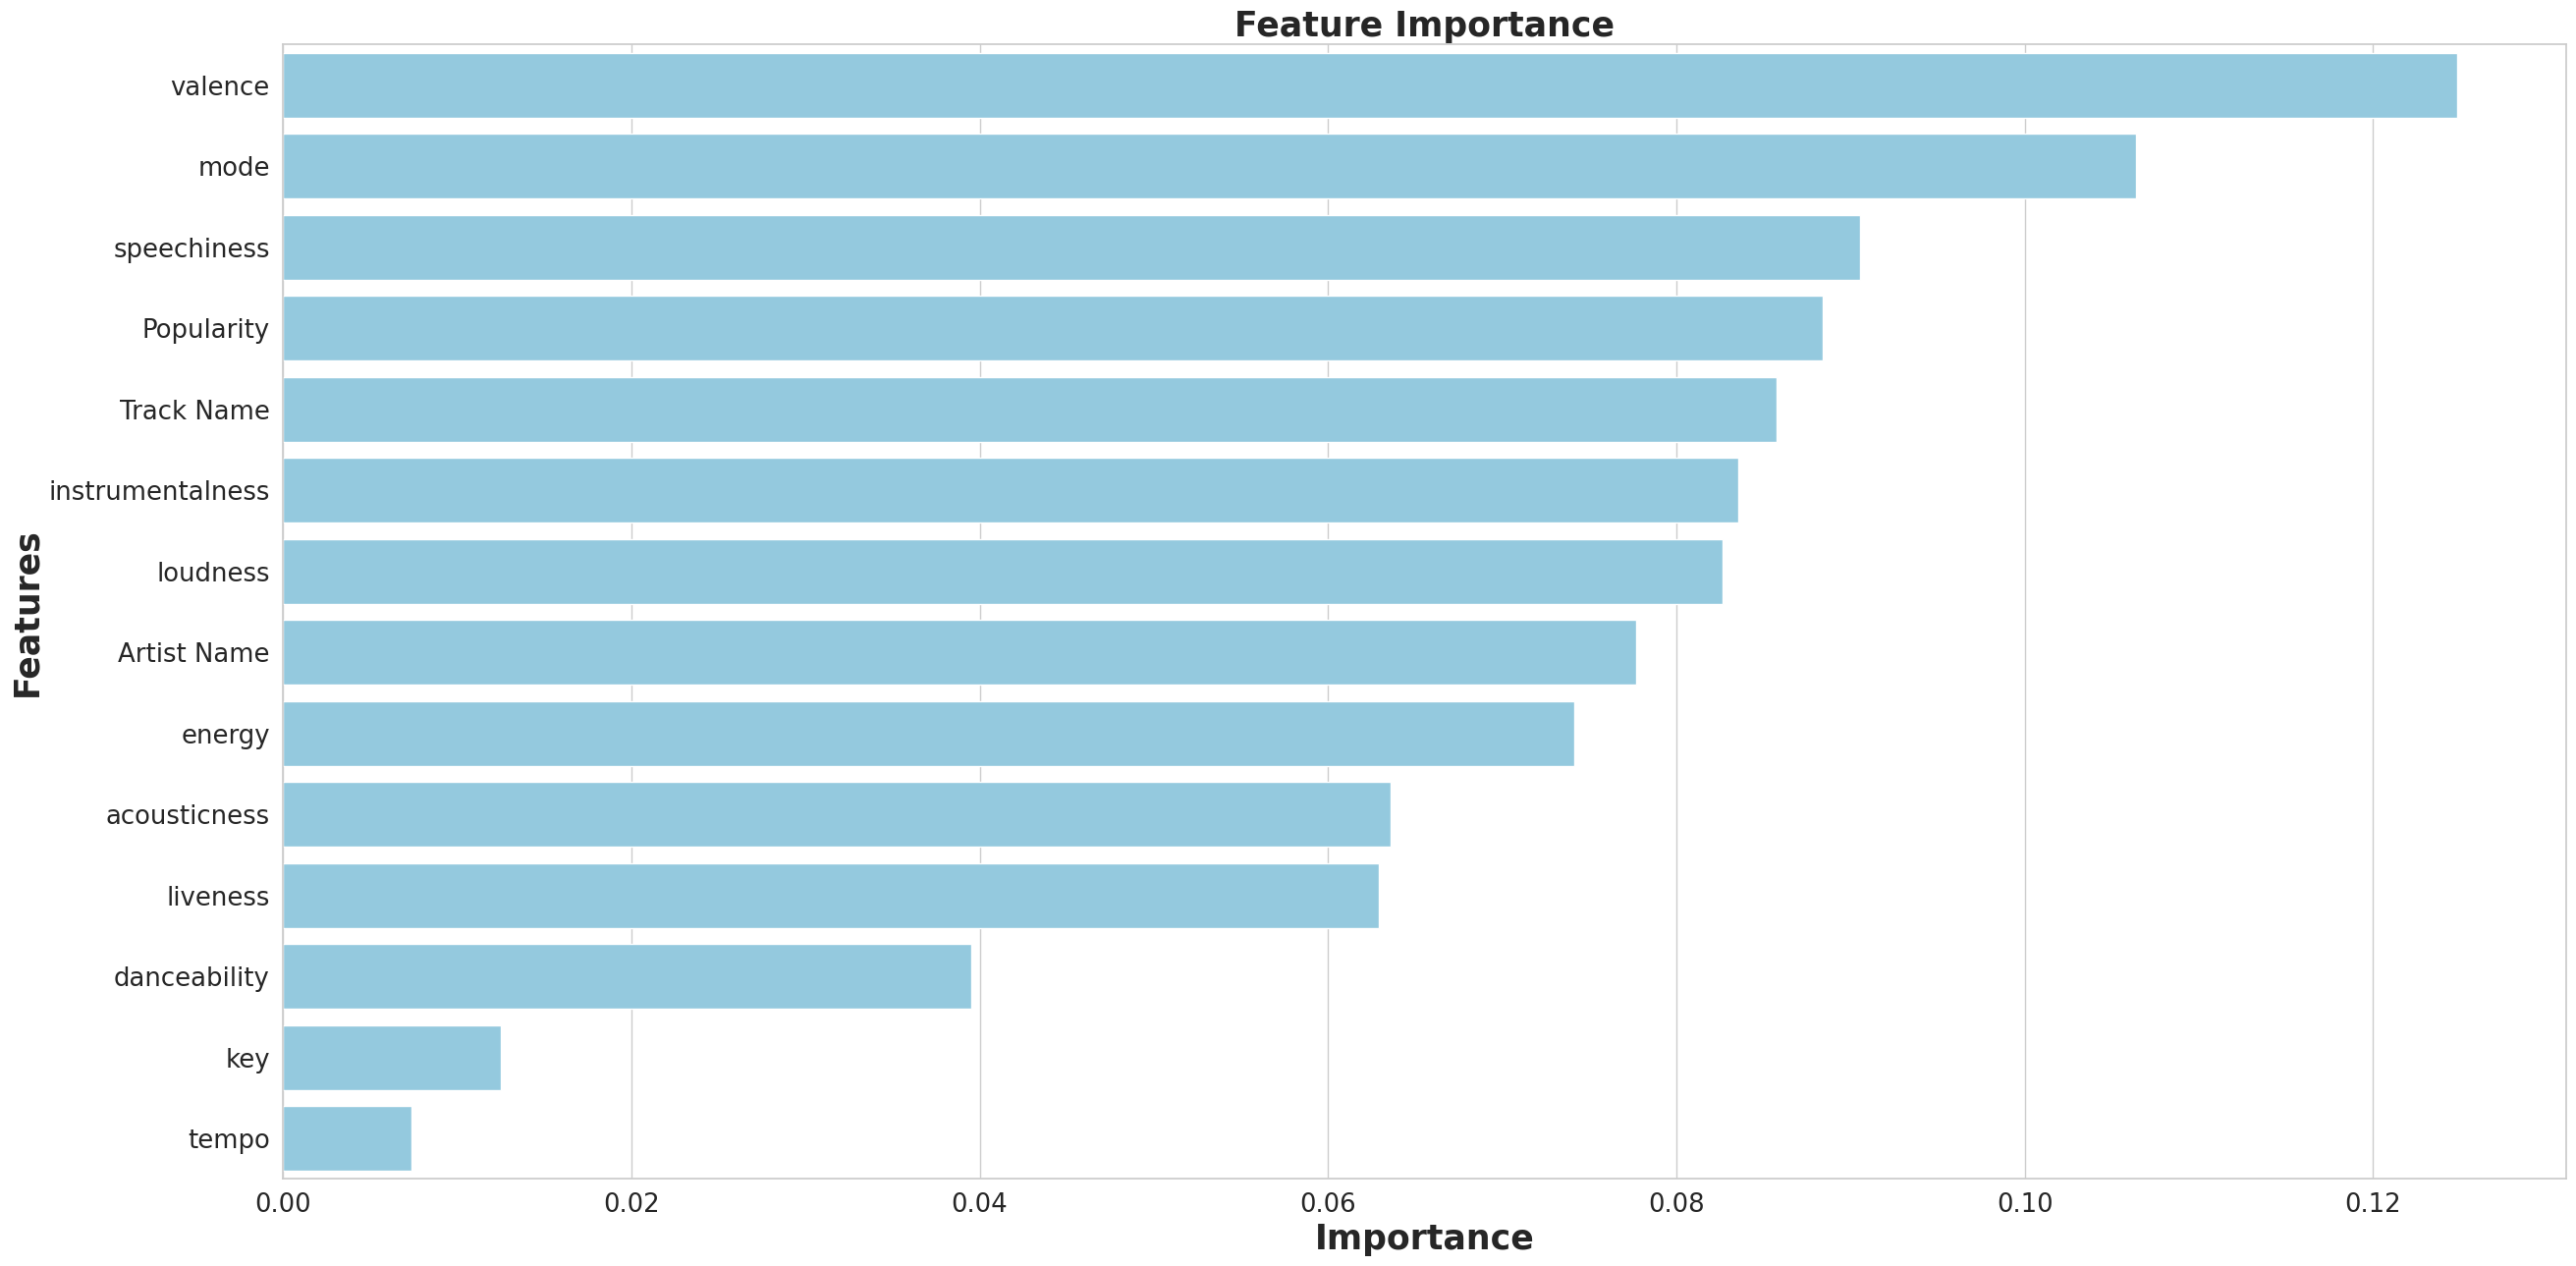

None

,Features,Gini-Importance
0,valence,0.124851
1,mode,0.106387
2,speechiness,0.090564
3,Popularity,0.088417
4,Track Name,0.085779
5,instrumentalness,0.083579
6,loudness,0.082650
7,Artist Name,0.077708
8,energy,0.074127
9,acousticness,0.063609


In [82]:
feats = {}
for feature, importance in zip(df.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set_theme(font_scale = 5)
sns.set_theme(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [83]:
y_pred = rfc.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred, zero_division=0))

[[ 80   0   0  10   4   0   0   1   0   1   1]
 [  0   7   6   0   0   4 126   0   2  11 103]
 [  0   1  91   0   0   3  29   0   2   8 105]
 [  9   0   0  54   1   0   0   2   0   0   1]
 [ 14   0   0   0  18   0   0   0   0   1   4]
 [  0   0   2   0   0  66  14   0   0  27  20]
 [  0  64  17   0   0  14 157   0  13  40 205]
 [  3   0   0   1   0   0   0 112   0   0   0]
 [  0   0   1   0   0   0  12   0 216   2 150]
 [  8   1  12   1   2  22  46   0   2  84  97]
 [  6  30  35   1   2   7 103   0 102  42 516]]
              precision    recall  f1-score   support

           0       0.67      0.82      0.74        97
           1       0.07      0.03      0.04       259
           2       0.55      0.38      0.45       239
           3       0.81      0.81      0.81        67
           4       0.67      0.49      0.56        37
           5       0.57      0.51      0.54       129
           6       0.32      0.31      0.31       510
           7       0.97      0.97      0.97      

In [84]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train)
print(rs.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 11, 'bootstrap': True}


In [87]:
y_pred = rs.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred, zero_division=0))

[[ 86   0   0   6   3   0   0   1   0   1   0]
 [  0   4   4   0   0   6  88   0   6   7 144]
 [  0   0  74   0   0   2  32   0   0   9 122]
 [ 11   0   0  53   0   0   0   2   0   1   0]
 [ 14   0   0   0  19   0   0   0   0   1   3]
 [  0   0   2   0   0  67  16   0   0  24  20]
 [  0   5  14   0   0  17 172   0  12  24 266]
 [  3   0   0   1   0   0   0 112   0   0   0]
 [  0   0   0   0   0   0  12   0 209   2 158]
 [  5   0   9   3   4  16  43   0   0  86 109]
 [  5   0  15   2   2   7  63   0  77  34 639]]
              precision    recall  f1-score   support

           0       0.69      0.89      0.78        97
           1       0.44      0.02      0.03       259
           2       0.63      0.31      0.41       239
           3       0.82      0.79      0.80        67
           4       0.68      0.51      0.58        37
           5       0.58      0.52      0.55       129
           6       0.40      0.34      0.37       510
           7       0.97      0.97      0.97      

In [92]:
genres_map = {0: 'Acoustic/Folk', 1: 'Alt_Music', 2: 'Blues', 3: 'Bollywood', 4: 'Country', 5: 'HipHop', 6: 'Indie Alt', 7: 'Instrumental', 8: 'Metal', 9: 'Pop', 10: 'Rock'}
df_test = pd.read_csv('test.csv', sep=',')
df_test.dropna(inplace=True)
df_test_for_model = df_test.drop(['Artist Name', 'Track Name'], axis=1)
y_pred = rs.predict(df_test_for_model)
df_test['Class'] = y_pred
df_test.head(10)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.000400,0.000009,0.2630,0.291,151.937,220413.0,4,8
3,Shawn Mendes,Wonder,80.0,0.333,0.637,1.0,-4.904,0,0.0581,0.131000,0.000018,0.1490,0.132,139.898,172693.0,4,10
5,Paul McCartney,Pretty Boys (feat. Khruangbin),56.0,0.696,0.979,11.0,-5.338,0,0.0445,0.002440,0.768000,0.1160,0.962,101.021,348859.0,4,6
6,The Flaming Lips,She Don't Use Jelly,60.0,0.330,0.556,7.0,-11.494,1,0.0796,0.207000,0.000044,0.3150,0.506,173.828,222279.0,4,10
7,The Vanities,Wasted All My Days,23.0,0.430,0.942,10.0,-3.008,1,0.0913,0.000166,0.000019,0.1030,0.557,91.483,140400.0,4,10
8,pizzagirl,car freshener aftershave,36.0,0.603,0.724,7.0,-6.843,1,0.0265,0.001350,0.000010,0.1840,0.387,129.984,243868.0,4,10
9,Dudu Tassa,◊ë◊õ◊ô◊†◊ï ◊ò◊¢◊ô◊†◊ï,20.0,0.403,0.742,7.0,-7.380,0,0.0604,0.218000,0.009040,0.0606,0.617,167.898,239987.0,4,10
11,The M√∂nic,Just Mad,29.0,0.324,0.798,2.0,-8.417,1,0.0310,0.051800,0.000006,0.2560,0.534,168.132,172217.0,4,10
14,Foo Fighters,Shame Shame,62.0,0.652,0.864,7.0,-4.108,1,0.0325,0.001380,0.043300,0.0371,0.380,122.026,257427.0,4,10
16,Tora Tora,Blue Tommorrow,20.0,0.626,0.609,4.0,-12.226,0,0.0371,0.008030,0.000019,0.1080,0.346,123.681,260120.0,4,10
